In [389]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('car_accident.txt', sep="\t", engine = 'python', encoding = 'utf8', index_col = 0, header=1, thousands = ',')
df.replace('-', 0, inplace=True)
df

,자치구,구분,합계,승용차,승합차,화물차,특수차,이륜차,기타
기간,,,,,,,,,
2015,합계,발생건수,41665,27915,2815,3117,71,4713,3034
2015,합계,사망자수,376,194,47,38,4,66,27
2015,합계,부상자수,58656,40866,4249,4299,98,5776,3368
2015,종로구,발생건수,1414,919,111,102,2,222,58
2015,종로구,사망자수,8,5,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...
2019,송파구,사망자수,13,6,1,1,0,5,0
2019,송파구,부상자수,4003,2726,267,291,22,345,352
2019,강동구,발생건수,1414,863,117,160,13,133,128


In [390]:
total = df.loc[df['자치구'] == '합계'].copy()
total.drop('자치구', axis='columns', inplace=True)
total

,구분,합계,승용차,승합차,화물차,특수차,이륜차,기타
기간,,,,,,,,
2015,발생건수,41665,27915,2815,3117,71,4713,3034
2015,사망자수,376,194,47,38,4,66,27
2015,부상자수,58656,40866,4249,4299,98,5776,3368
2016,발생건수,40039,27052,2740,2823,67,4540,2817
2016,사망자수,348,168,35,48,3,66,28
2016,부상자수,55669,39054,3963,3870,107,5529,3146
2017,발생건수,38625,25733,2629,2875,77,4287,3024
2017,사망자수,343,172,35,45,2,62,27
2017,부상자수,53810,37425,3846,3878,114,5202,3345


In [391]:
# 년도별 발생건수, 사망자수, 부상자수 깔끔하게 나타내는 코드 짜기
total_sum = total.loc[:,:'합계']
df2015 = total_sum.loc['2015', :]
df2015.index=df2015['구분']
df2015.drop('구분', axis='columns', inplace=True)

df2016 = total_sum.loc['2016', :]
df2016.index=df2016['구분']
df2016.drop('구분', axis='columns', inplace=True)

df2017 = total_sum.loc['2017', :]
df2017.index=df2017['구분']
df2017.drop('구분', axis='columns', inplace=True)

df2018 = total_sum.loc['2018', :]
df2018.index=df2018['구분']
df2018.drop('구분', axis='columns', inplace=True)

df2019 = total_sum.loc['2019', :]
df2019.index=df2019['구분']
df2019.drop('구분', axis='columns', inplace=True)

df_concat = pd.concat([df2015, df2016, df2017, df2018, df2019], axis=1)
df_concat.columns=['2015', '2016', '2017', '2018', '2019']
df_concat = df_concat.transpose()
df_concat['발생건수에 대한 사망자수의 비율'] = df_concat['사망자수']/df_concat['발생건수']
df_concat['발생건수에 대한 부상자수의 비율'] = df_concat['부상자수']/df_concat['발생건수']
df_concat

C:\Users\Home\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


구분,발생건수,사망자수,부상자수,발생건수에 대한 사망자수의 비율,발생건수에 대한 부상자수의 비율
2015,41665,376,58656,0.01,1.41
2016,40039,348,55669,0.01,1.39
2017,38625,343,53810,0.01,1.39
2018,38795,304,53751,0.01,1.39
2019,39258,250,53904,0.01,1.37


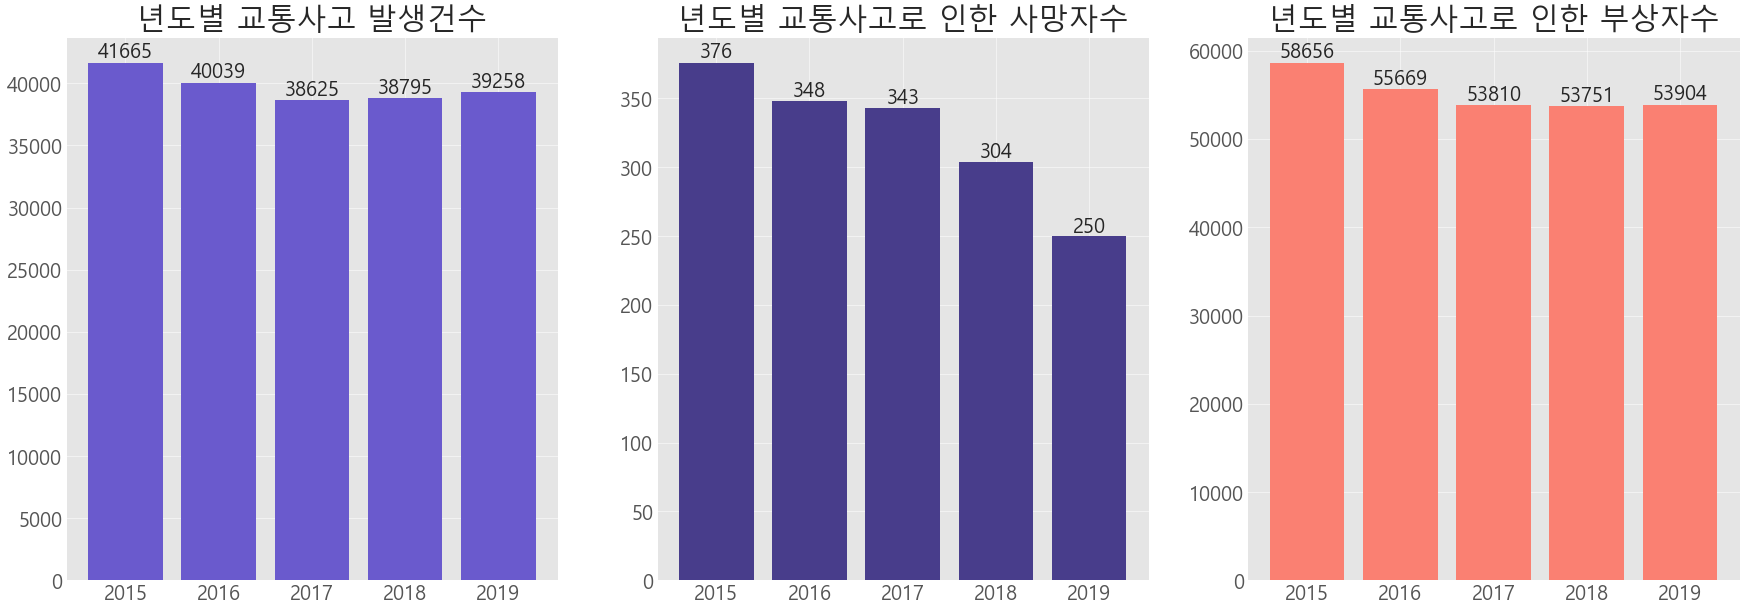

In [392]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(30,10))
plt.style.use('tableau-colorblind10')

graph1 = plt.subplot(1,3,1)
plt.title('년도별 교통사고 발생건수', size=30)
plt.bar(df_concat.index, df_concat['발생건수'], color='slateblue')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for p in graph1.patches:
    left, bottom, width, height = p.get_bbox().bounds
    graph1.annotate("%.f"%(height), (left+width/2, height*1.01), ha='center', fontsize=20)

graph2 = plt.subplot(1,3,2)
plt.title('년도별 교통사고로 인한 사망자수', size=30)
plt.bar(df_concat.index, df_concat['사망자수'], color='darkslateblue')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for p in graph2.patches:
    left, bottom, width, height = p.get_bbox().bounds
    graph2.annotate("%.f"%(height), (left+width/2, height*1.01), ha='center', fontsize=20)

graph3 = plt.subplot(1,3,3)
plt.title('년도별 교통사고로 인한 부상자수', size=30)
plt.bar(df_concat.index, df_concat['부상자수'], color='salmon')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for p in graph3.patches:
    left, bottom, width, height = p.get_bbox().bounds
    graph3.annotate("%.f"%(height), (left+width/2, height*1.01), ha='center', fontsize=20)


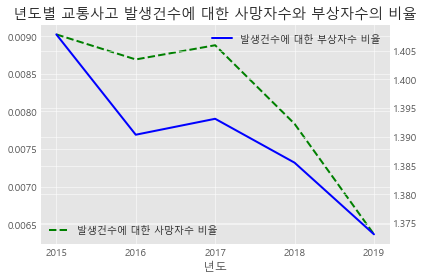

In [393]:
y1 = df_concat['발생건수에 대한 사망자수의 비율']
y2 = df_concat['발생건수에 대한 부상자수의 비율']

plt.style.use('ggplot')

fig, ax1 = plt.subplots()
ax1.set_xlabel('년도')
ax1.plot(df_concat.index, y1, 'g--', label='발생건수에 대한 사망자수 비율')
ax1.tick_params(axis='y')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(df_concat.index, y2, 'b-', label='발생건수에 대한 부상자수 비율')
ax2.tick_params(axis='y')
plt.legend()

plt.title('년도별 교통사고 발생건수에 대한 사망자수와 부상자수의 비율')
fig.tight_layout()
plt.show()


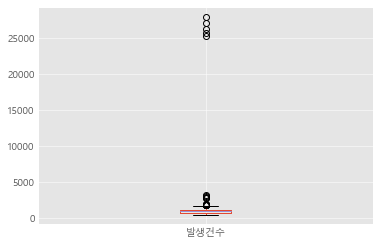

In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('car_accident.txt', sep="\t", engine = 'python', encoding = 'utf8', index_col = 0, header=1, thousands = ',')
df.replace('-', 0, inplace=True)
승용차 = df[['구분', '승용차']]
승용차
승용차1 = 승용차.loc[승용차['구분']=='발생건수']
승용차2 = 승용차.loc[승용차['구분']=='사망자수']
승용차3 = 승용차.loc[승용차['구분']=='부상자수']
final승용차 = pd.concat([승용차1, 승용차2, 승용차3], axis=1)
final승용차.drop('구분', axis='columns', inplace=True)
final승용차.columns = ['발생건수', '사망자수', '부상자수']
final승용차 = final승용차.astype('float')
final승용차.plot(kind='box', y='발생건수')
final승용차 = final승용차.reset_index()

0.5178339122289686

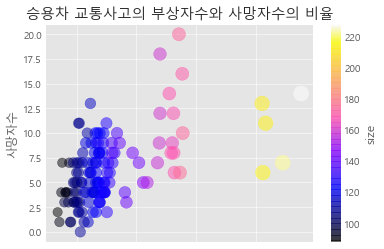

In [402]:
outlier1 = final승용차['발생건수'] > 10000
final승용차.drop(final승용차[outlier1].index, axis='index', inplace=True)
final승용차['size'] = final승용차['발생건수'].apply(np.sqrt)
final승용차['size'] = final승용차['size'] * 4

final승용차.plot(kind='scatter', x='부상자수', y='사망자수', s='size', c='size', cmap='gnuplot2', alpha=0.5)
plt.title('승용차 교통사고의 부상자수와 사망자수의 비율')
plt.colorbar

final승용차['부상자수'].corr(final승용차['사망자수'])


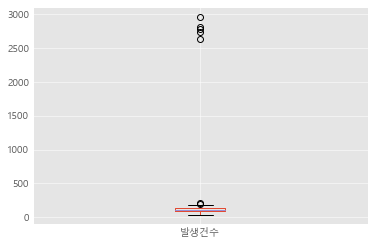

In [403]:
승합차 = df[['구분', '승합차']]

승합차1 = 승합차.loc[승합차['구분']=='발생건수']
승합차2 = 승합차.loc[승합차['구분']=='사망자수']
승합차3 = 승합차.loc[승합차['구분']=='부상자수']

final승합차 = pd.concat([승합차1, 승합차2, 승합차3], axis=1)
final승합차.drop('구분', axis='columns', inplace=True)
final승합차.columns = ['발생건수', '사망자수', '부상자수']
final승합차 = final승합차.astype('float')
final승합차.plot(kind='box', y='발생건수')
final승합차 = final승합차.reset_index()

0.2919838946744766

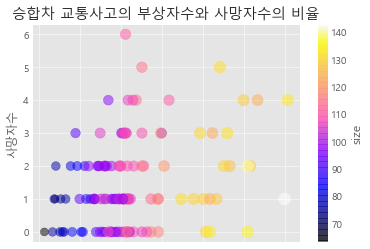

In [404]:
outlier2 = final승합차['발생건수'] > 2000
final승합차.drop(final승합차[outlier2].index, axis='index', inplace=True)
final승합차['size'] = final승합차['발생건수'].apply(np.sqrt)
final승합차['size'] = final승합차['size'] * 10
final승합차

final승합차.plot(kind='scatter', x='부상자수', y='사망자수', s='size', c='size', cmap='gnuplot2', alpha=0.5)
plt.title('승합차 교통사고의 부상자수와 사망자수의 비율')
plt.colorbar

final승합차['부상자수'].corr(final승합차['사망자수'])

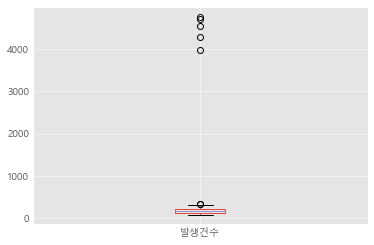

In [405]:
이륜차 = df[['구분', '이륜차']]

이륜차1 = 이륜차.loc[이륜차['구분']=='발생건수']
이륜차2 = 이륜차.loc[이륜차['구분']=='사망자수']
이륜차3 = 이륜차.loc[이륜차['구분']=='부상자수']

final이륜차 = pd.concat([이륜차1, 이륜차2, 이륜차3], axis=1)
final이륜차.drop('구분', axis='columns', inplace=True)
final이륜차.columns = ['발생건수', '사망자수', '부상자수']
final이륜차 = final이륜차.astype('float')
final이륜차.plot(kind='box', y='발생건수')
final이륜차 = final이륜차.reset_index()

0.21371754831175668

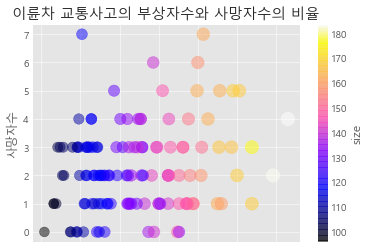

In [406]:
outlier = final이륜차['발생건수'] > 3000
final이륜차.drop(final이륜차[outlier].index, axis='index', inplace=True)
final이륜차['size'] = final이륜차['발생건수'].apply(np.sqrt)
final이륜차['size'] = final이륜차['size'] * 10
final이륜차

final이륜차.plot(kind='scatter', x='부상자수', y='사망자수', s='size', c='size', cmap='gnuplot2', alpha=0.5)
plt.title('이륜차 교통사고의 부상자수와 사망자수의 비율')
plt.colorbar

final이륜차['부상자수'].corr(final이륜차['사망자수'])